In [1]:
from get_sentiment import *

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dizquierdo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
with open('data/tweets.json', 'r') as f:
    data = json.load(f)

In [3]:
clean_tweets, tag_set = cluster_flocks(data)

In [4]:
tag_set.most_common(5)

[('#BernieWon', 522),
 ('#RiggedPrimary', 519),
 ('#MayorCheat', 512),
 ('#ShadowInc', 434),
 ('#IowaCaucusDisaster', 414)]

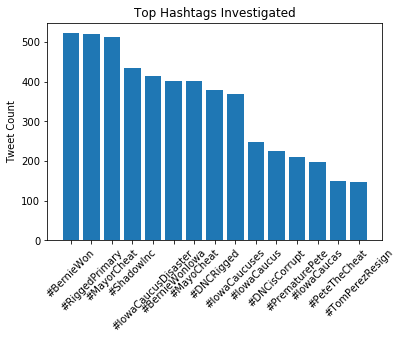

In [5]:
fig = plt.bar([tag[0] for tag in tag_set.most_common(15)], [tag[1] for tag in tag_set.most_common(15)])
plt.xticks(rotation=45)
plt.ylabel('Tweet Count')
plt.title('Top Hashtags Investigated')
plt.show;

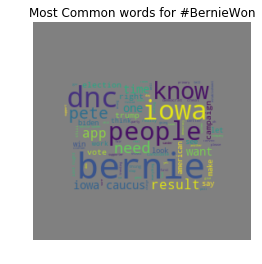

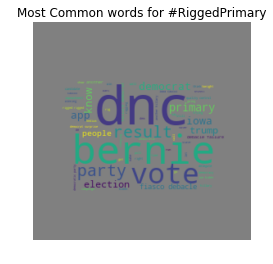

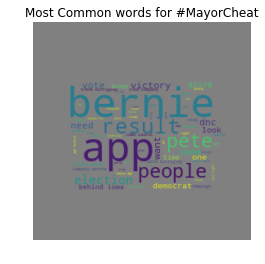

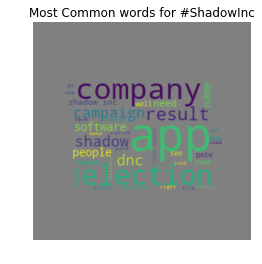

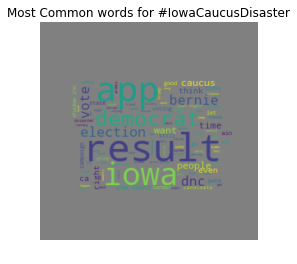

In [6]:
for tag in tag_set.most_common(5):
    subset = list(filter(lambda x: tag[0] in x[1], clean_tweets))
    create_wordcloud([tweet[0] for tweet in subset] , tag[0], 200)